In [1]:
%matplotlib inline

#import sys
import numpy as np
#np.set_printoptions(threshold=sys.maxsize)
import matplotlib.pyplot as plt
import matplotlib.colors as cm
import pynbody
from michaels_functions import (center_and_r_vir, remove_bulk_velocity,
                                read_unit_from_info)
from matplotlib.colors import LogNorm
from matplotlib.pyplot import figure

In [2]:
run = "hydro_59"
out = "output_00050"
path = "bulk1/data_2/" + run + "/output/"
data = pynbody.load(path + out)
aexp = data.properties['a']
data.physical_units()

r_vir = center_and_r_vir(data, aexp, path)
remove_bulk_velocity(data)
r_e = 0.1 * r_vir

sph_5 = pynbody.filt.Sphere(radius='%f kpc' % r_e)
region = data[sph_5]

omega_b, unit_l, unit_d, unit_t = read_unit_from_info(data)

('shifting on Stars:', SimArray([ 0.00308878, -0.03302971, -0.04676732], 'kpc'))
('virial radius:', SimArray(152.40432611, 'kpc'))


In [3]:
m_p = pynbody.array.SimArray(1.672621e-24, "g")
G = pynbody.array.SimArray(6.6732e-8, "cm**3 g**-1 s**-2")
T_mean = pynbody.array.SimArray(10., "K")
K_b = pynbody.array.SimArray(1.380622e-16, "g cm**2 s**-2 K**-1")
K_b_ev = pynbody.array.SimArray(8.617e-5, "eV K**-1")
K_b_erg = pynbody.array.SimArray(1.380622e-16, "erg K**-1")
c_cgs = pynbody.array.SimArray(2.9979245e10, "cm s**-1")
h_ev = pynbody.array.SimArray(4.135667e-15, "eV s")
mH_cgs = pynbody.array.SimArray(1.6735575e-24, 'g')  # hydrogen mass
eV_to_ergs = pynbody.array.SimArray(1.60218e-12, "erg eV**-1")
L_sun = pynbody.array.SimArray(3.839e33, "erg s**-1")
M_sun = pynbody.array.SimArray(2e33, "g")

In [4]:
X_H2_bar = np.load('outputs/debug_1.1/X_H2_bar_' + run + '_' + out + '.npy')
X_CO_bar = np.load('outputs/debug_1.1/X_CO_bar_' + run + '_' + out + '.npy')
mach_no_arr = np.load('outputs/debug_1.1/mach_no_arr_' + run + '_' + out + '.npy')
n_H_mean_arr = pynbody.array.SimArray(np.load('outputs/debug_1.1/n_H_mean_arr_' + run + '_' + out + '.npy'),\
                                      "cm**-3")
metal_arr = np.load('outputs/debug_1.1/metal_arr_' + run + '_' + out + '.npy')
temperature = np.load('outputs/debug_1.1/T_' + run + '_' + out + '.npy')
l_CO_bar = np.load('outputs/debug_1.1/l_CO_bar_' + run + '_' + out + '.npy')
l_CO_SI_bar = np.load('outputs/debug_1.1/l_CO_SI_bar_' + run + '_' + out + '.npy')
m_H2_bar = np.load('outputs/debug_1.1/m_H2_bar_' + run + '_' + out + '.npy')
M_H2_sim = region.gas["mass"].in_units('Msol') * X_H2_bar
mass = np.load('outputs/debug_1.1/mass_' + run + '_' + out + '.npy')
cell_width_arr = region.gas["smooth"].in_units('cm')
n_H2_mean = pynbody.array.SimArray(X_H2_bar * n_H_mean_arr, "cm**-3")

/home/cluster/mkrets/anaconda2/lib/python2.7/site-packages/pynbody-0.47-py2.7-linux-x86_64.egg/pynbody/snapshot/__init__.py:1443: RuntimeWarning: Conjoining derived and non-derived arrays. Assuming result is non-derived, so no further updates will be made.
  "Conjoining derived and non-derived arrays. Assuming result is non-derived, so no further updates will be made.", RuntimeWarning)


In [5]:
M_H2_galaxy_sim = np.sum(M_H2_sim)
print M_H2_galaxy_sim/1e9
print np.log10(M_H2_galaxy_sim)

2.863026956050193
9.456825437022207


In [11]:
print 0.2*mass_galaxy/1e8

5.726053912100386


In [7]:
L_CO = np.sum(l_CO_bar*(cell_width_arr**3))
print np.log10(L_CO/L_sun)

2.4563235284095977


In [18]:
mass_galaxy = np.sum(mass * X_H2_bar)
print mass_galaxy/1e9

2.863026956050193


In [12]:
L_CO_SI = np.sum(l_CO_SI_bar*(cell_width_arr**3)/M_sun)
print L_CO_SI/1e8

0.7345740229434368


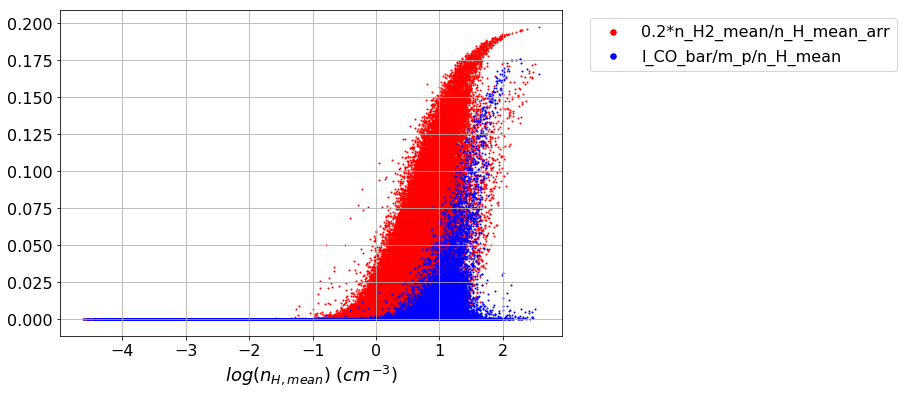

In [20]:
fig, ax = plt.subplots(figsize=(9,6))
plt.rc('figure', titlesize=18)
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=18)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels
plt.rc('legend', fontsize=16)    # legend fontsize
plt.scatter(np.log10(n_H_mean_arr), 0.2 * n_H2_mean/n_H_mean_arr, 
                      c="r", label = "0.2*n_H2_mean/n_H_mean_arr", s=1)
plt.scatter(np.log10(n_H_mean_arr), l_CO_SI_bar/m_p/n_H_mean_arr, 
                      c="b", label = "l_CO_bar/m_p/n_H_mean", s=1)
plt.xlabel('$log(n_{H, mean}) \ (cm^{-3})$')
# plt.ylabel('$log(l_{CO, SI, bar}) \ (K km s^{-1} pc^{2})$')
# ax.set_ylim([-0.1,0.5])
# ax.set_xlim([-4, 7])
legend = plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
plt.grid(b=True, which='both', axis='both')
# plt.title("$log(n_{H, mean})$ vs $log(l_{CO, SI, bar})$")
# plt.savefig('outputs/debug_1.1/log(n_H_mean)vsl_CO_SI_bar.png', 
#             dpi=300, bbox_inches='tight')
plt.show()

In [14]:
M_H = n_H_mean_arr * cell_width_arr**3 * m_p
M_H_galaxy = np.sum(M_H)
print M_H_galaxy/M_sun/1e10
print np.log10(M_H_galaxy/M_sun)

1.2892373104658728
10.110332865483622


/net/cephfs/home/mkrets/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """


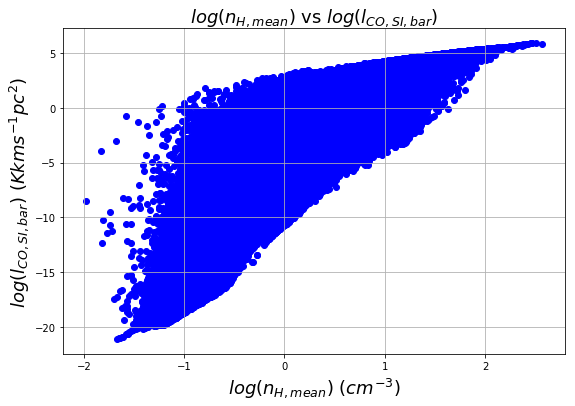

In [35]:
fig, ax = plt.subplots(figsize=(9,6))
plt.rc('figure', titlesize=18)
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=18)    # fontsize of the x and y labels
plt.scatter(np.log10(n_H_mean_arr), np.log10(l_CO_SI_bar), 
                      c="b")
plt.xlabel('$log(n_{H, mean}) \ (cm^{-3})$')
plt.ylabel('$log(l_{CO, SI, bar}) \ (K km s^{-1} pc^{2})$')
# ax.set_ylim([-0.1,0.5])
# ax.set_xlim([-4, 7])
plt.grid(b=True, which='both', axis='both')
plt.title("$log(n_{H, mean})$ vs $log(l_{CO, SI, bar})$")
plt.savefig('outputs/debug_1.1/log(n_H_mean)vsl_CO_SI_bar.png', 
            dpi=300, bbox_inches='tight')
plt.show()

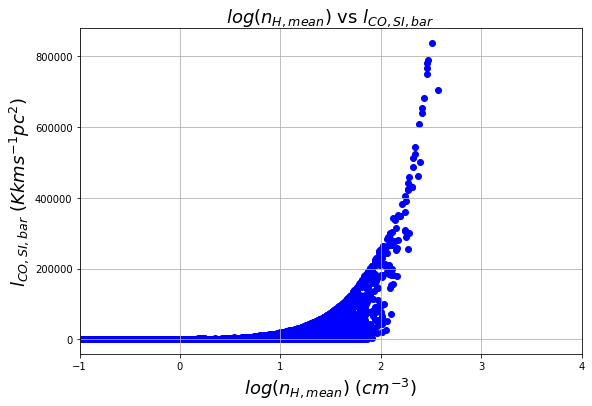

In [36]:
fig, ax = plt.subplots(figsize=(9,6))
plt.rc('figure', titlesize=18)
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=18)    # fontsize of the x and y labels
plt.scatter(np.log10(n_H_mean_arr), l_CO_SI_bar, 
                      c="b")
plt.xlabel('$log(n_{H, mean}) \ (cm^{-3})$')
plt.ylabel('$l_{CO, SI, bar} \ (K km s^{-1} pc^{2})$')
# ax.set_ylim([-0.1,5])
ax.set_xlim([-1, 4])
plt.grid(b=True, which='both', axis='both')
plt.title("$log(n_{H, mean})$ vs $l_{CO, SI, bar}$")
plt.savefig('outputs/debug_1.1/log(n_H_mean)vsl_CO_SI_bar.png', 
            dpi=300, bbox_inches='tight')
plt.show()

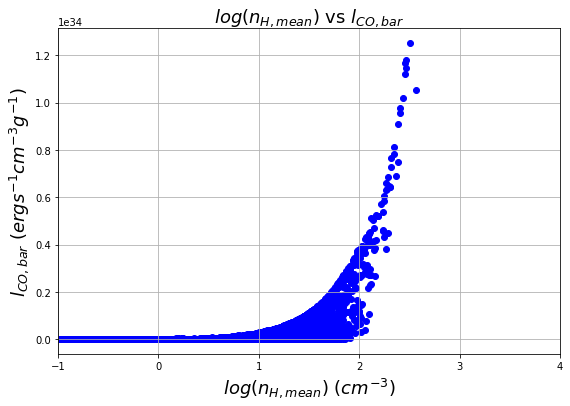

In [37]:
fig, ax = plt.subplots(figsize=(9,6))
plt.rc('figure', titlesize=18)
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=18)    # fontsize of the x and y labels
plt.scatter(np.log10(n_H_mean_arr), l_CO_bar, 
                      c="b")
plt.xlabel('$log(n_{H, mean}) \ (cm^{-3})$')
plt.ylabel('$l_{CO, bar} \ (erg s^{-1} cm^{-3} g^{-1})$')
# ax.set_ylim([-3e-5,6e-4])
ax.set_xlim([-1, 4])
plt.grid(b=True, which='both', axis='both')
plt.title("$log(n_{H, mean})$ vs $l_{CO, bar}$")
plt.savefig('outputs/debug_1.1/log(n_H_mean)vsl_CO_bar.png', 
            dpi=300, bbox_inches='tight')
plt.show()

/net/cephfs/home/mkrets/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """


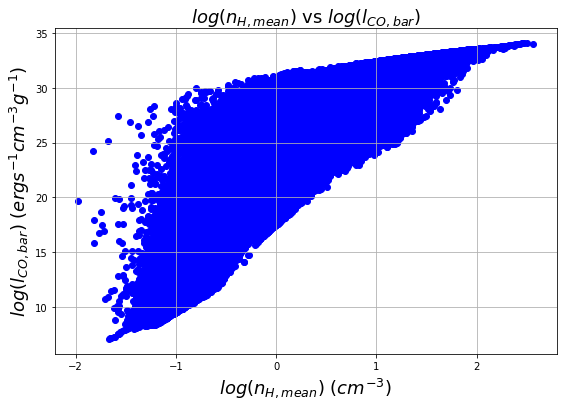

In [38]:
fig, ax = plt.subplots(figsize=(9,6))
plt.rc('figure', titlesize=18)
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=18)    # fontsize of the x and y labels
plt.scatter(np.log10(n_H_mean_arr), np.log10(l_CO_bar), 
                      c="b")
plt.xlabel('$log(n_{H, mean}) \ (cm^{-3})$')
plt.ylabel('$log(l_{CO, bar}) \ (erg s^{-1} cm^{-3} g^{-1})$')
# ax.set_ylim([-3e-5,6e-4])
# ax.set_xlim([0, 4])
plt.grid(b=True, which='both', axis='both')
plt.title("$log(n_{H, mean})$ vs $log(l_{CO, bar})$")
plt.savefig('outputs/debug_1.1/log(n_H_mean)vslog(l_CO_bar).png', 
            dpi=300, bbox_inches='tight')
plt.show()

/net/cephfs/home/mkrets/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  
/net/cephfs/home/mkrets/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  


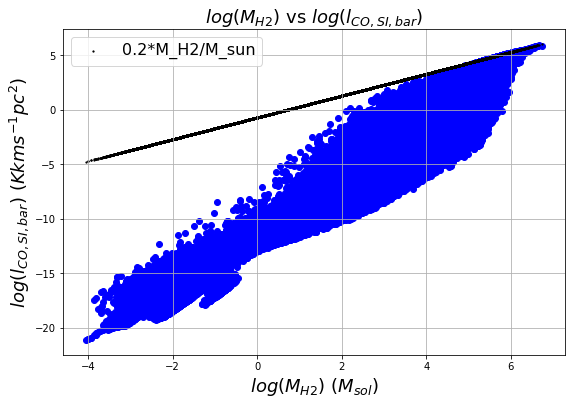

In [135]:
fig, ax = plt.subplots(figsize=(9,6))
plt.rc('figure', titlesize=18)
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=18)    # fontsize of the x and y labels
plt.rc('legend', fontsize=16)    # legend fontsize
plt.scatter(np.log10(M_H2/M_sun), np.log10(l_CO_SI_bar), 
                      c="b")
plt.scatter(np.log10(M_H2/M_sun), np.log10(0.2*M_H2/M_sun), c='k', s=1.5, label="0.2*M_H2/M_sun")
plt.xlabel('$log(M_{H2}) \ (M_{sol})$')
plt.ylabel('$log(l_{CO, SI, bar}) \ (K km s^{-1} pc^{2})$')
# ax.set_ylim([-3,7])
# ax.set_xlim([3, 7])
ax.legend(loc = 'upper left')
plt.grid(b=True, which='both', axis='both')
plt.title("$log(M_{H2})$ vs $log(l_{CO, SI, bar})$")
plt.savefig('outputs/debug_1.1/log(M_H2)vslog(l_CO_SI_bar).png', 
            dpi=300, bbox_inches='tight')
plt.show()

/net/cephfs/home/mkrets/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  
/net/cephfs/home/mkrets/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  


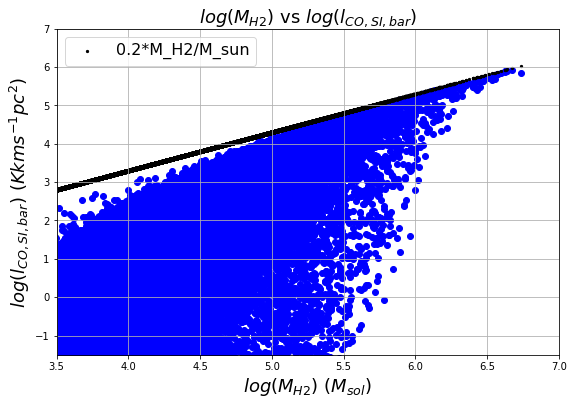

In [136]:
fig, ax = plt.subplots(figsize=(9,6))
plt.rc('figure', titlesize=18)
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=18)    # fontsize of the x and y labels
plt.rc('legend', fontsize=16)    # legend fontsize
plt.scatter(np.log10(M_H2/M_sun), np.log10(l_CO_SI_bar), 
                      c="b")
plt.scatter(np.log10(M_H2/M_sun), np.log10(0.2*M_H2/M_sun), c='k', s=5, label="0.2*M_H2/M_sun")
plt.xlabel('$log(M_{H2}) \ (M_{sol})$')
plt.ylabel('$log(l_{CO, SI, bar}) \ (K km s^{-1} pc^{2})$')
ax.set_ylim([-1.5,7])
ax.set_xlim([3.5, 7])
ax.legend(loc = 'upper left')
plt.grid(b=True, which='both', axis='both')
plt.title("$log(M_{H2})$ vs $log(l_{CO, SI, bar})$")
plt.savefig('outputs/debug_1.1/log(M_H2)vslog(l_CO_SI_bar)-zoomed.png', 
            dpi=300, bbox_inches='tight')
plt.show()

In [138]:
M_H = n_H_mean_arr * cell_width_arr**3 * m_p

In [140]:
M_H_galaxy = np.sum(M_H)
print M_H_galaxy
print M_H_galaxy/M_sun/1e10
print np.log10(M_H_galaxy/M_sun)

2.5792774764079424e+43
1.2896387382039713
10.110468070006569
